# **Lab 1A: Training, validation, model selection, and testing**
## The Salary versus Age example from Hull Section 1.4, analysed with Python
Section 1.4 explains some of the most important principles of machine learning. Sticking to these principles will get you well on your way to producing valid and reliable results with your machine learning applications. The idea of this lab is to try to reproduce the results in Hull Section 1.4, as exactly as possible. 

This notebook is partially complete and you are to complete and correct things where appropriate. There are also some questions included, for you to answer.

In [1]:
import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

np.set_printoptions(precision=3)  # print results with 3 decimals behind the decimal point

## 1. Loading and splitting the data

In [2]:
# Load the data 
raw = pd.read_csv('Salary_vs_Age.csv')
# Check the data
print(raw.shape) # check dimensions
raw.head(10)    # check against Hull Table 1.1

(30, 2)


,Age,Salary
0,25,135000
1,55,260000
2,27,105000
3,35,220000
4,60,240000
5,65,265000
6,45,270000
7,40,300000
8,50,265000
9,30,105000


<div style="background-color:#c2eafa">
We split the data into a training, validation, and test set as needed for the analysis with our regression models that follows.

In [3]:
raw_array = np.array(raw) # convert dataframe into numpy array 
training_data = raw_array[:10, :] # First ten instances will form the training data set (as in Table 1.1).
validation_data = raw_array[10:20, :] # The next ten instances will form the validation data (Table 1.2).
test_data = raw_array[20:, :] # The final ten instances will form the test set (Table 1.4)

<div style="background-color:#c2eafa">
    
**Question 1** What is the purpose for each of the sets we make?

<div style="background-color:#f1be3e">

Write your answer here 
    
[//]: # (START ANSWER)
[//]: # (END ANSWER)

## 2. Plotting Figure 1.2

<div style="background-color:#c2eafa">
We will now plot the training data; a plot for has already been given, but requires some sprucing up. 

In [4]:
training_data

array([[    25, 135000],
       [    55, 260000],
       [    27, 105000],
       [    35, 220000],
       [    60, 240000],
       [    65, 265000],
       [    45, 270000],
       [    40, 300000],
       [    50, 265000],
       [    30, 105000]], dtype=int64)

In [5]:
train_age, train_sal = training_data[:,0], training_data[:,1]
np.vstack([train_age, train_sal]).transpose()

array([[    25, 135000],
       [    55, 260000],
       [    27, 105000],
       [    35, 220000],
       [    60, 240000],
       [    65, 265000],
       [    45, 270000],
       [    40, 300000],
       [    50, 265000],
       [    30, 105000]], dtype=int64)

<div style="background-color:#c2eafa">
    
Find out what type of object `ax` is and search the Matplotlib API reference for 'matplotlib.axes.Axes.set' to find out how to
> * label the x- and y-axis of the plot;
> * add a title to the plot;
> * change the axes ranges;

Then add commands to make the figure below look exactly like Figure 1.2 in Hull. We have already passed an appropriate figure size argument to `subplots()` so that the proportions more or less match those of Figure 1.2.

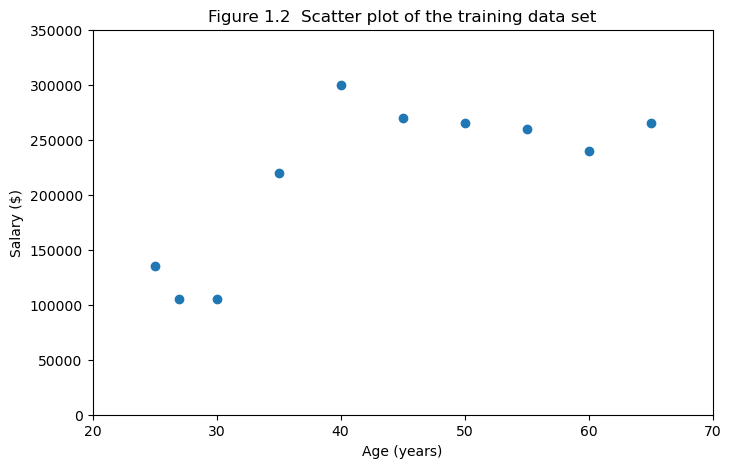

In [6]:
# Create a figure 
fig, ax = plt.subplots(figsize = (8,5))  

# START ANSWER
ax.set_xlim([20,70])
ax.set_ylim([0,350000])
# END ANSWER 

# Plot the training data 
ax.scatter(train_age, train_sal)

# START ANSWER
ax.set_ylabel("Salary ($)")
ax.set_xlabel("Age (years)")
ax.set_title('Figure 1.2  Scatter plot of the training data set')
# END ANSWER

plt.show()

## 3. Fitting a fifth degree polynomial to the training data
Below we have used Numpy's `polyfit` and `poly1d` because it seems an accessible route for this first lab; look them up in the Numpy's API Reference. At the end, we will redo some of the analyses using Scikit-learn methods.

In [7]:
coef5 = np.polyfit(train_age, train_sal, 5)  # coefficients of LS fit, highest order first
for i in range(6):
    print(f"b{i}= {coef5[5-i]:+10.3e}") 
print("")
p5 = np.poly1d(coef5)  # creates a polynomial function with coefficients from coef5
print(np.vstack((train_age, train_sal, p5(train_age))).transpose())

b0= +1.920e+07
b1= -2.312e+06
b2= +1.075e+05
b3= -2.404e+03
b4= +2.599e+01
b5= -1.094e-01

[[2.500e+01 1.350e+05 1.350e+05]
 [5.500e+01 2.600e+05 2.420e+05]
 [2.700e+01 1.050e+05 9.972e+04]
 [3.500e+01 2.200e+05 2.139e+05]
 [6.000e+01 2.400e+05 2.533e+05]
 [6.500e+01 2.650e+05 2.620e+05]
 [4.500e+01 2.700e+05 2.933e+05]
 [4.000e+01 3.000e+05 2.849e+05]
 [5.000e+01 2.650e+05 2.637e+05]
 [3.000e+01 1.050e+05 1.173e+05]]


<div style="background-color:#c2eafa">
    
**Question 2.** What do you notice about the fitted coefficients? Can you explain (some of) it?

**Question 3.** What's in the matrix that is printed?

<div style="background-color:#f1be3e">
    
Write your answer here 

[//]: # (START ANSWER)
[//]: # (END ANSWER)

<div style="background-color:#c2eafa">
    
Compute the residuals for this model fit as well as the root mean squared error.

In [8]:
train5_res = None
train5_rmse = None

# START ANSWER
train5_res = p5(train_age) - train_sal
train5_rmse = np.std(train5_res)
# END ANSWER
print(f"rmse = {train5_rmse:5.0f}")

rmse = 12240


<div style="background-color:#c2eafa">

This is not the same as the 12902 in Hull which is a factor sqrt(10/9) bigger. Look up `numpy.std` and play with `ddof` until you get it: it seems that Hull uses *root mean squared error* and *standard deviation of the errors* interchangeably, though this is not correct.

Below add commands to make the figure look exactly like Figure 1.3 in Hull.

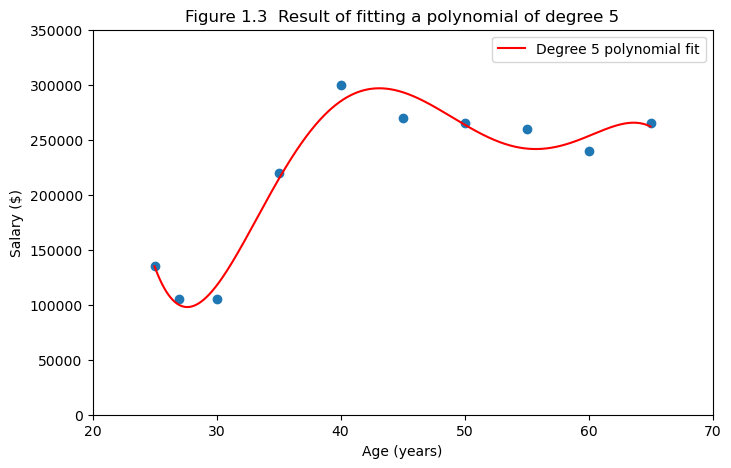

In [9]:
# Create figure that looks exactly like Hull Figure 1.3
fig, ax = plt.subplots(figsize = [8,5])  
ax.scatter(train_age, train_sal)
age_range = np.linspace(np.min(train_age), np.max(train_age), 1000)
ax.plot(age_range, p5(age_range), color='red', label='Degree 5 polynomial fit')

# START ANSWER
ax.set_xlim([20, 70])  # set limit as in Figure 1.2
ax.set_ylim([0, 350000])

# Add labels and a legend
ax.set_ylabel('Salary ($)')
ax.set_xlabel('Age (years)')
ax.set_title("Figure 1.3  Result of fitting a polynomial of degree 5")
ax.legend()
# END ANSWER

# Display the plot
plt.show()

## 4. Plotting Figure 1.4 (the validation data) and adding the fitted curve
Use the validation data to (exactly) reproduce Hull Figure 1.4. Add to the figure the fitted fifth order polynomial we just determined.

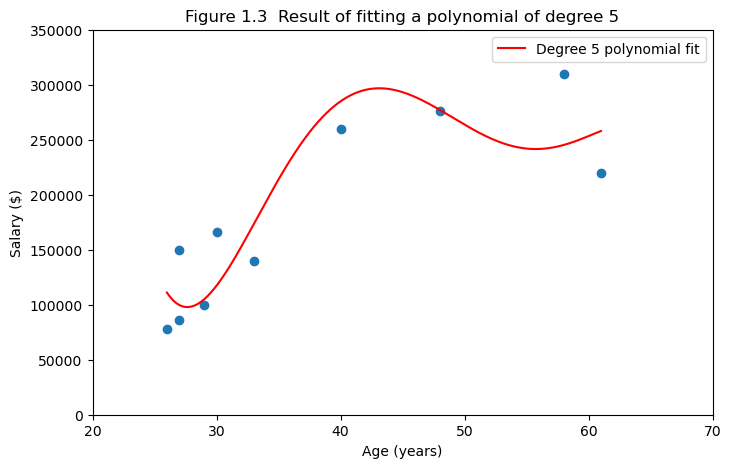

In [15]:
# Create figure that looks exactly like Hull Figure 1.3
fig, ax = plt.subplots(figsize = [8,5])  
ax.scatter(val_age, val_sal)
age_range = np.linspace(np.min(val_age), np.max(val_age), 1000)
ax.plot(age_range, p5(age_range), color='red', label='Degree 5 polynomial fit')

# START ANSWER
ax.set_xlim([20, 70])  # set limit as in Figure 1.2
ax.set_ylim([0, 350000])

# Add labels and a legend
ax.set_ylabel('Salary ($)')
ax.set_xlabel('Age (years)')
ax.set_title("Figure 1.3  Result of fitting a polynomial of degree 5")
ax.legend()
# END ANSWER

# Display the plot
plt.show()

<div style="background-color:#c2eafa">

**Question 4.** What is your conclusion about the fitted model, judging by the plot you just made?

<div style="background-color:#f1be3e">

Write your answer here 
    
[//]: # (START ANSWER)
[//]: # (END ANSWER)

<div style="background-color:#c2eafa">
    
Compute the residuals for the validation data and the fitted model and then the root mean squared error.

In [17]:
val5_res = p5(val_age) - val_sal
val5_rmse = np.std(val5_res, ddof=1)

# START ANSWER
# END ANSWER

print(f"rmse = {val5_rmse:5.0f}")

rmse = 38794


<div style="background-color:#c2eafa">
    
**Question 5.** Are these results signs of overfitting or underfitting? Explain.

<div style="background-color:#f1be3e">
    
Write your answer here 

[//]: # (START ANSWER)
[//]: # (END ANSWER)

## 5. Fit a quadratic model to the training data and reproduce Figure 1.5
You can do that on your own....

In [22]:
coef2 = np.polyfit(train_age, train_sal, 2)
for i in range(3):
    print(f"b{i} = {coef2[2-i]:+10.3e}")
print("")
p2 = np.poly1d(coef2)
print(np.vstack((train_age, train_sal, p2(train_age))).transpose())

b0= -3.822e+05
b1= +2.538e+04
b2= -2.433e+02

[[2.500e+01 1.350e+05 1.002e+05]
 [5.500e+01 2.600e+05 2.776e+05]
 [2.700e+01 1.050e+05 1.257e+05]
 [3.500e+01 2.200e+05 2.080e+05]
 [6.000e+01 2.400e+05 2.646e+05]
 [6.500e+01 2.650e+05 2.395e+05]
 [4.500e+01 2.700e+05 2.671e+05]
 [4.000e+01 3.000e+05 2.437e+05]
 [5.000e+01 2.650e+05 2.785e+05]
 [3.000e+01 1.050e+05 1.602e+05]]
b0 = -3.822e+05
b1 = +2.538e+04
b2 = -2.433e+02

[[2.500e+01 1.350e+05 1.002e+05]
 [5.500e+01 2.600e+05 2.776e+05]
 [2.700e+01 1.050e+05 1.257e+05]
 [3.500e+01 2.200e+05 2.080e+05]
 [6.000e+01 2.400e+05 2.646e+05]
 [6.500e+01 2.650e+05 2.395e+05]
 [4.500e+01 2.700e+05 2.671e+05]
 [4.000e+01 3.000e+05 2.437e+05]
 [5.000e+01 2.650e+05 2.785e+05]
 [3.000e+01 1.050e+05 1.602e+05]]


In [23]:
train2_res = None
train2_rmse = None

# START ANSWER
train2_res = p2(train_age) - train_sal
train2_rmse = np.std(train2_res, ddof=1)

# END ANSWER
print(f"rmse training set: {train2_rmse:5.0f}")

rmse training set: 32932


In [24]:
val2_res = None
val2_rmse = None

# START ANSWER
val2_res = p2(val_age) - val_sal
val2_rmse = np.std(val2_res, ddof=1)

# END ANSWER
print(f"rmse validation set: {val2_rmse:5.0f}")

rmse validation set: 33554


## 6. Fit a linear model to the training data and reproduce Figure 1.6
Just go ahead.

In [26]:
# START ANSWER
coef1 = np.polyfit(train_age, train_sal, 1)
for i in range(2):
    print(f"b{i} = {coef1[1-i]:+10.3e}")
print("")
p1 = np.poly1d(coef1)
print(np.vstack((train_age, train_sal, p1(train_age))).transpose())
# END ANSWER

b0 = +5.116e+04
b1 = +3.827e+03

[[2.500e+01 1.350e+05 1.468e+05]
 [5.500e+01 2.600e+05 2.617e+05]
 [2.700e+01 1.050e+05 1.545e+05]
 [3.500e+01 2.200e+05 1.851e+05]
 [6.000e+01 2.400e+05 2.808e+05]
 [6.500e+01 2.650e+05 2.999e+05]
 [4.500e+01 2.700e+05 2.234e+05]
 [4.000e+01 3.000e+05 2.043e+05]
 [5.000e+01 2.650e+05 2.425e+05]
 [3.000e+01 1.050e+05 1.660e+05]]


In [27]:
train1_res = None
train1_rmse = None

# START ANSWER
train1_res = p1(train_age) - train_sal
train1_rmse = np.std(train1_res, ddof=1)
# END ANSWER
print(f"rmse training set  : {train1_rmse:5.0f}")

val1_res = None
val1_rmse = None

# START ANSWER
val1_res = p1(val_age) - val_sal
val1_rmse = np.std(val1_res, ddof=1)
# END ANSWER
print(f"rmse validation set: {val1_rmse:5.0f}")

rmse training set  : 49731
rmse validation set: 49990


## 7. Compute root mean square errors and reproduce Table 1.3
Go ahead:

In [29]:
# make the table:
# START ANSWER
train_rmse = [train5_rmse, train2_rmse, train1_rmse]
validation_rmse = [val5_rmse, val2_rmse, val1_rmse]

columns = ["Polynomial degree 5", "Quadratic model", "Linear model"]
table = pd.DataFrame(data=[train_rmse , validation_rmse] ,columns = columns, index = ['training set rmse', "validation set rmse"])
table.round(decimals=0)
# END ANSWER

,Polynomial degree 5,Quadratic model,Linear model
training set rmse,12902.0,32932.0,49731.0
validation set rmse,38794.0,33554.0,49990.0


## 8. Redo all regression models and a bit more using Scikit-learn
What we did above followed the exposition of Section 1.4. Once you have overview, there may be a more efficient way to get all the results. You may already have done some things more efficiently than in the answers above.
Below we use Scikit-learn tools  (in Python you write `sklearn` for Scikit-learn):
 + `sklearn.linear_model.LinearRegression`, and
 + `sklearn.preprocessing.PolynomialFeatures`

Check out what [PolynomialFeatures](https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features) does.

<div style="background-color:#c2eafa">
We will now create five regression models from degree 1 to 5. Each model will be trained on the training data and then tested on the validation data. We will store the rmse of the training and validation data in arrays. Complete the code block by calculating the RMSE for the training set and validation set and storing it in the defined arrays. 

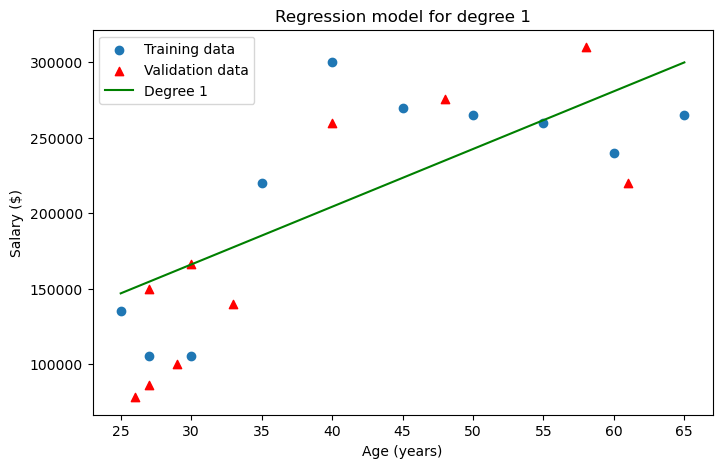

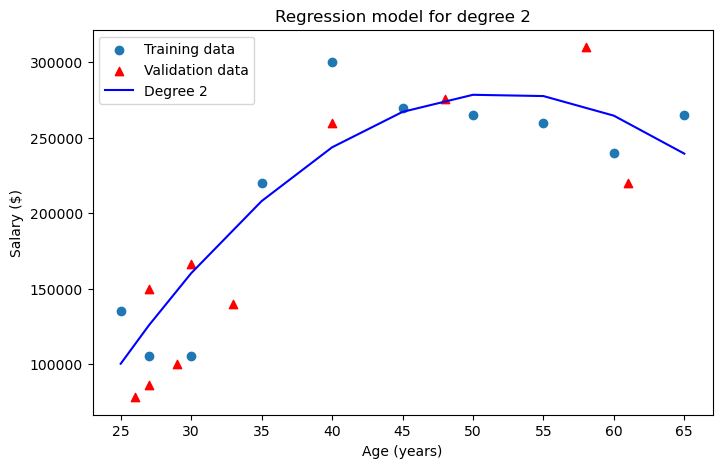

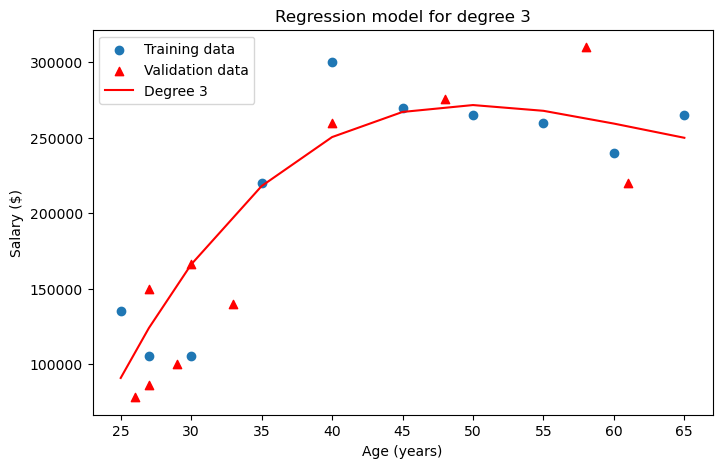

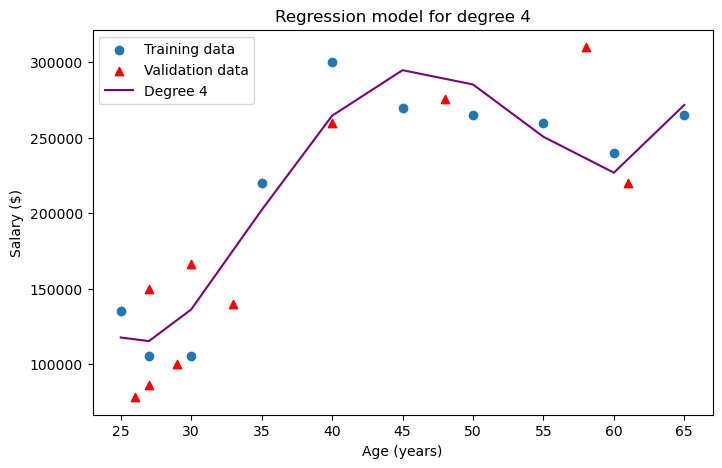

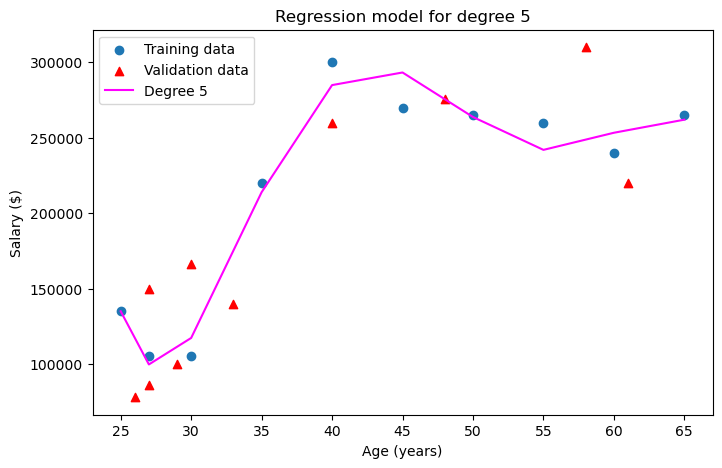

[49731.130681244904, 32932.08272044401, 31988.5170252661, 21824.146733626898, 12902.203044685957]
[49989.62442279351, 33553.77147604331, 35587.521487220045, 37426.63472478634, 38793.92359563083]


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train, y_train = training_data[:, 0], training_data[:, 1] 
X_val, y_val = validation_data[:, 0], validation_data[:, 1]
X_test, y_test = test_data[:, 0], test_data[:, 1] 

# Degrees 
degrees = [1,2,3,4,5] 
colors = ['green', 'blue', 'red', 'purple', 'magenta']
train_rmse = [] 
validation_rmse = [] 

for i in degrees: 
    plt.subplots(figsize = [8,5])
    plt.scatter(X_train, y_train, label = 'Training data')
    plt.scatter(X_val, y_val, color = 'red', marker = '^', label = 'Validation data')

    # Create polynomial features
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_val_poly = poly.fit_transform(X_val.reshape(-1, 1))

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train) 
    
    train_predictions = model.predict(X_train_poly) 
    val_predictions = model.predict(X_val_poly) 
    
    # START ANSWER 
    train_err = train_predictions - y_train
    train_rmse.append(np.std(train_err, ddof=1))
    val_err = val_predictions - y_val
    validation_rmse.append(np.std(val_err, ddof=1))
    # END ANSWER
    
    
    sorted_indices = np.argsort(X_train)
    X_test_polynomial = X_train[sorted_indices]
    predictions = train_predictions[sorted_indices]
    plt.plot(X_test_polynomial, predictions, color=colors[i-1], label=f"Degree {i}")

    # Add labels and a legend
    plt.xlabel('Age (years)')
    plt.ylabel('Salary ($)')
    plt.title(f"Regression model for degree {i}")
    plt.legend()

    # Display the plot
    plt.show()
print(train_rmse)
print(validation_rmse)

<div style="background-color:#c2eafa">

Plot the training rmse and validation rmse on the same graph for the different models.

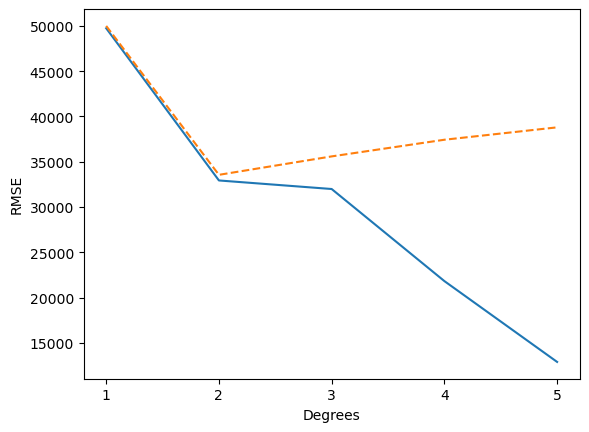

In [43]:
# START ANSWER
plt.plot(degrees, train_rmse, label="Training set RMSE")
plt.plot(degrees, validation_rmse, linestyle="dashed", label = "Validation set RMSE")
plt.xlabel("Degrees")
plt.ylabel("RMSE")
plt.xticks(ticks=[1,2,3,4,5])
plt.show()
# END ANSWER

<div style="background-color:#c2eafa">
Create a table showing the rmse of the training and validation sets of the different regression models

In [44]:
# START ANSWER 
columns = ["Polynomial degree 5", "Quadratic model", "Linear model"]
table = pd.DataFrame(data=[train_rmse , validation_rmse] ,columns = degrees, index = ['training set rmse', "validation set rmse"])
table.round(decimals=0)
# END ANSWER 

,1,2,3,4,5
training set rmse,49731.0,32932.0,31989.0,21824.0,12902.0
validation set rmse,49990.0,33554.0,35588.0,37427.0,38794.0


<div style="background-color:#c2eafa">

**Question 6.** Comment on things you notice about the graphs and  the table. Rank the models in terms of performace. Which model displays signs of overfitting or underfitting? Does the best fit model generalize well from the training set to the validation set?

<div style="background-color:#f1be3e">

Write your answer here 

    
[//]: # (START ANSWER)
[//]: # (END ANSWER)

<div style="background-color:#c2eafa">
    
Determine the final prediction rmse on the **test** set using the best determined model. 

In [47]:
# START ANSWER 
X_test, y_test = test_data[:, 0], test_data[:, 1]
test2_err = p2(X_test) - y_test
test2_rmse = np.std(test2_err, ddof=1)
print(test2_rmse)


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train.reshape(-1, 1))
X_poly_test = poly.fit_transform(X_test.reshape(-1, 1))
model = LinearRegression()
model.fit(X_poly, y_train)
predictions = model.predict(X_poly_test)
rmse = np.std(predictions - y_test, ddof=1)  

print(rmse)
# END ANSWER 

34273.28083412735
34273.28083412667
